# Concept to predict (generate) uniformity core configuration and p margin upon burnup core configuration

In [619]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..'))) # imports top level

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import display
import scipy

In [620]:

df = pd.read_excel("input.xlsx", sheet_name="no_burnup")

In [621]:
df.columns

Index(['Name', 'pmar', 'p, %', 'p, beff', '7-6_s', '7-5_s', '7-4_s', '7-3_s',
       '6-6_s', '6-5_s', '6-4_s', '6-3_s', '5-6_s', '5-3_s', '4-6_s', '4-3_s',
       '3-6_s', '3-5_s', '3-4_s', '3-3_s', '2-6_s', '2-5_s', '2-4_s', '2-3_s',
       '7-6_b', '7-5_b', '7-4_b', '7-3_b', '6-6_b', '6-5_b', '6-4_b', '6-3_b',
       '5-6_b', '5-3_b', '4-6_b', '4-3_b', '3-6_b', '3-5_b', '3-4_b', '3-3_b',
       '2-6_b', '2-5_b', '2-4_b', '2-3_b', '7-6_t', '7-5_t', '7-4_t', '7-3_t',
       '6-6_t', '6-5_t', '6-4_t', '6-3_t', '5-6_t', '5-3_t', '4-6_t', '4-3_t',
       '3-6_t', '3-5_t', '3-4_t', '3-3_t', '2-6_t', '2-5_t', '2-4_t', '2-3_t',
       'Temperature, K', 'p loss due to temperature, %', 'Notes'],
      dtype='object')

In [622]:
df.describe()

,pmar,"p, %","p, beff",7-6_s,7-5_s,7-4_s,7-3_s,6-6_s,6-5_s,6-4_s,...,3-6_t,3-5_t,3-4_t,3-3_t,2-6_t,2-5_t,2-4_t,2-3_t,"Temperature, K","p loss due to temperature, %"
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.0,165.0,165.0,165.0,165.000000,165.0,165.0,165.0,165.000000,165.000000
mean,1.058927,5.649519,7.196839,0.830237,0.989037,0.995596,0.917468,0.890113,1.075508,1.090778,...,265.0,265.0,265.0,265.0,286.000000,300.0,300.0,300.0,300.675758,-0.111847
std,0.017848,1.594237,2.030875,0.202732,0.159743,0.163109,0.166127,0.196135,0.180295,0.178095,...,0.0,0.0,0.0,0.0,17.198624,0.0,0.0,0.0,6.375402,0.056104
min,1.021710,2.230769,2.841744,0.477689,0.642833,0.557562,0.665724,0.553706,0.710634,0.725046,...,265.0,265.0,265.0,265.0,265.000000,300.0,300.0,300.0,289.000000,-0.220300
25%,1.044820,4.413234,5.621954,0.642652,0.861660,0.907721,0.779049,0.702756,0.919063,0.934554,...,265.0,265.0,265.0,265.0,265.000000,300.0,300.0,300.0,293.000000,-0.176300
50%,1.058030,5.617022,7.155442,0.826256,1.036003,1.020919,0.893300,0.867113,1.097339,1.091110,...,265.0,265.0,265.0,265.0,300.000000,300.0,300.0,300.0,300.000000,-0.105900
75%,1.072840,6.895356,8.783893,1.021445,1.106342,1.114213,1.020429,1.038418,1.215715,1.240883,...,265.0,265.0,265.0,265.0,300.000000,300.0,300.0,300.0,308.000000,-0.044300
max,1.103970,9.594128,12.221820,1.245396,1.292089,1.325074,1.357336,1.365215,1.462137,1.443561,...,265.0,265.0,265.0,265.0,300.000000,300.0,300.0,300.0,313.000000,-0.009100


In [623]:
d = display.Display(df=df)
d.quick_processing()

[('average', 'ALL_CELLS'), ('right_center_side', 'RIGHT_CENTER_SIDE'), ('left_center_side', 'LEFT_CENTER_SIDE'), ('right_side', 'RIGHT_SIDE'), ('left_side', 'LEFT_SIDE'), ('center', 'CENTER'), ('qul', 'QUL'), ('qur', 'QUR'), ('qll', 'QLL'), ('qlr', 'QLR')]


In [624]:
percentage_cols =  d.CORE_PARTS["percentage"]["ALL_CELLS"]

d.df.loc[:, percentage_cols] = d.df.loc[:, d.CORE_PARTS["burnup"]["ALL_CELLS"]].to_numpy() / d.df.loc[:, d.CORE_PARTS["fuel_type"]["ALL_CELLS"]].to_numpy() * 100

In [625]:
fuel_left_cols = d.CORE_PARTS["left"]["ALL_CELLS"]

d.df.loc[:, fuel_left_cols] = d.df.loc[:, d.CORE_PARTS["fuel_type"]["ALL_CELLS"]].to_numpy() - d.df.loc[:, d.CORE_PARTS["burnup"]["ALL_CELLS"]].to_numpy()

In [626]:
d.df["average_p"] = d.df.loc[:, percentage_cols].mean(axis=1)

In [627]:
d.df["average_l"] = d.df.loc[:, fuel_left_cols].mean(axis=1)

In [628]:
df = d.df

# Predicting uniniformity coefs for whole core

In [629]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, Normalizer, PowerTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [630]:
df_c = df.loc[
    :, 
    [
        *fuel_left_cols,
        *d.CORE_PARTS["coef"]["ALL_CELLS"],
        *percentage_cols,
        "average",
        "p, %"
    ]
]

In [631]:
y_c = df.loc[:, [*d.CORE_PARTS["coef"]["ALL_CELLS"], "p, %"]]
X_raw_c = df_c.drop([*d.CORE_PARTS["coef"]["ALL_CELLS"], "p, %"], axis=1)

In [632]:
ct_c = ColumnTransformer(
    [
        ("", StandardScaler(), X_raw_c.columns)
    ]
).set_output(transform="pandas")

In [633]:
X_c = ct_c.fit_transform(X_raw_c)

In [634]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

In [635]:
gbr_c = MultiOutputRegressor(GradientBoostingRegressor())
# gbr_c = MultiOutputRegressor(RandomForestRegressor())

In [636]:
gbr_c.fit(X_train_c, y_train_c)

MultiOutputRegressor(estimator=GradientBoostingRegressor())

In [637]:
y_gbr_c = gbr_c.predict(X_test_c)

In [638]:
gbr_c.score(X_test_c, y_test_c)

0.9493161893886776

In [639]:
mean_absolute_error(
    y_gbr_c[:, :-1], 
    y_test_c.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]
), mean_absolute_error(
    y_gbr_c[:, -1], y_test_c["p, %"]
)

(0.026349539014115696, 0.35522156158525925)

In [640]:
mean_absolute_percentage_error(
    y_gbr_c[:, :-1], 
    y_test_c.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]

), mean_absolute_percentage_error(
    y_gbr_c[:, -1], y_test_c["p, %"]
)

(0.026884193170262794, 0.06622293590682787)

<Axes: xlabel='None', ylabel='p, %'>

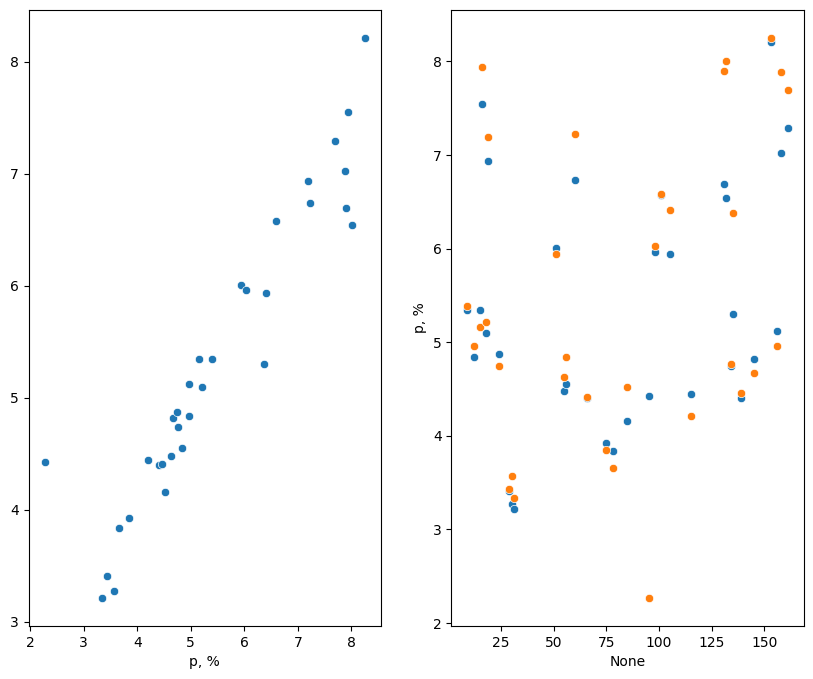

In [641]:
fig, axs = plt.subplots(1,2, figsize=(10,8))
sns.scatterplot(x=y_test_c["p, %"], y=y_gbr_c[:, -1], ax=axs[0])
sns.scatterplot(x=y_test_c["p, %"].index, y=y_gbr_c[:, -1], ax=axs[1])
sns.scatterplot(x=y_test_c["p, %"].index, y=y_test_c["p, %"], ax=axs[1])

In [642]:
d.display(y_test_c.iloc[0], dt="_s")

,6,5,4,3
7,0.641746,1.009702,1.011795,0.973728
6,1.059585,1.000632,0.802707,0.700313
5,0.960377,nan,nan,1.113400
4,0.886466,nan,nan,1.118578
3,1.163611,0.869137,1.143092,1.417326
2,0.720673,1.116914,1.168877,1.121342


In [643]:
d.display(y_gbr_c[0, :-1], dt="_s")


,6,5,4,3
7,0.697753,1.040571,1.114234,1.017781
6,1.161937,1.074008,0.835641,0.824901
5,1.018442,nan,nan,1.101942
4,0.872430,nan,nan,1.127713
3,1.188622,0.851331,1.102562,1.278924
2,0.691437,1.063077,1.097081,1.085180


## Test on some never seen data

In [644]:
# # some extra tests (fc 111)
# inp_str = "61.43	45.74	23.95	23.66	26.20	20.48	56.21	3.51	38.06	10.55	25.90	30.92	23.40	52.10	22.16	3.12	46.07	0.00	59.31	29.84"
# y_111 = "0.504 0.772 1.034 1.054 0.795 1.190 0.845 1.269 0.898 1.584 1.050 1.322 0.871 0.832 1.262 1.213 0.699 1.196 0.666 0.944"
# y_111 = y_111.split()
# inp_l = np.array(inp_str.split())

In [645]:
# inp_df = pd.DataFrame(
#     [*inp_l, 30.13],
#     index=[*d.CORE_PARTS["burnup"]["ALL_CELLS"], "average"]
# ).T

In [646]:
# inp_df_c = ct_c.transform(inp_df)

In [647]:
# predict_inp = gbr_c.predict(inp_df_c)

In [648]:
# d.display(data=predict_inp[0, :-1], dt="coef")

In [649]:
# y_111_df = pd.DataFrame(y_111, index=np.array(d.CORE_PARTS["coef"]["ALL_CELLS"])).T
# d.display(data=y_111_df.iloc[0], dt="coef")

In [650]:
# y_111_p = ((1.08297 - 1) / 1.08297)*100
# y_111_p, predict_inp[:, -1]

# V0.1
# MAE (p) is about 0.34
# MAPE (p) is about 0.055
# MAE (coef) is about 0.030
# MAPE (coef) is about 0.031

# V0.2
# MAE (p) is about 0.36
# MAPE (p) is about 0.055
# MAE (coef) is about 0.030
# MAPE (coef) is about 0.031

# Persisting of model

In [651]:
from joblib import dump


In [652]:
# dump(gbr_c, "gbr_c_v0.2_no_stacking.joblib")

# There is a design to predict ununiformity coef and p (margin)
## Use the two step approach:
## The ununiformity coefs predicts upon burnup map + average burnup
## The p (margin) predicts upon burnup map + average burnup + ununiformity coefs (result of first model prediction)

## First model

In [653]:
df_ts = d.df.loc[
    :,
    [
        *d.CORE_PARTS["burnup"]["ALL_CELLS"],
        *fuel_left_cols,
        *d.CORE_PARTS["coef"]["ALL_CELLS"],
        *percentage_cols,
        # "left_side",
        # "center",
        # "right_side",
        # "left_side_s",
        # "center_s",
        # "right_side_s",
        # "average",
        "p, %"
    ]
]

In [654]:
y_ts1 = df_ts.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]

X_raw_ts1 = df_ts.drop(
    [
        *d.CORE_PARTS["coef"]["ALL_CELLS"], "p, %", 
        # "average"
    ],
    axis=1
)

In [655]:
ct_ts1 = ColumnTransformer(
    [
        ("num", StandardScaler(), X_raw_ts1.columns),
        # ("oe", OrdinalEncoder(), unique_fuel_cells)
    ]
).set_output(transform="pandas")

In [656]:
X_ts1 = ct_ts1.fit_transform(X_raw_ts1)

In [657]:
X_train_ts1, X_test_ts1, y_train_ts1, y_test_ts1 = train_test_split(X_ts1, y_ts1, test_size=0.4, random_state=42)

In [658]:
gbr_ts1 = MultiOutputRegressor(GradientBoostingRegressor()).fit(X_train_ts1, y_train_ts1)
dtr_ts1 = DecisionTreeRegressor().fit(X_train_ts1, y_train_ts1)
ada_ts1 = MultiOutputRegressor(AdaBoostRegressor()).fit(X_train_ts1, y_train_ts1)
ridge_ts1 = MultiOutputRegressor(Ridge()).fit(X_train_ts1, y_train_ts1)
lasso_ts1 = MultiOutputRegressor(Lasso()).fit(X_train_ts1, y_train_ts1)
svr_ts1 = MultiOutputRegressor(SVR()).fit(X_train_ts1, y_train_ts1)
en_ts1 = MultiOutputRegressor(ElasticNet(l1_ratio=0.01)).fit(X_train_ts1, y_train_ts1)
br_ts1 = MultiOutputRegressor(BayesianRidge()).fit(X_train_ts1, y_train_ts1)
sgd_ts1 = MultiOutputRegressor(SGDRegressor(loss="squared_error")).fit(X_train_ts1, y_train_ts1)

In [659]:
gbr_ts1.score(X_test_ts1, y_test_ts1
), dtr_ts1.score(X_test_ts1, y_test_ts1
    ), ada_ts1.score(X_test_ts1, y_test_ts1
        ), ridge_ts1.score(X_test_ts1, y_test_ts1
            ), lasso_ts1.score(X_test_ts1, y_test_ts1
                ), svr_ts1.score(X_test_ts1, y_test_ts1
                    ), en_ts1.score(X_test_ts1, y_test_ts1
                        ), br_ts1.score(X_test_ts1, y_test_ts1
                            ), sgd_ts1.score(X_test_ts1, y_test_ts1)

(0.9487868649984641,
 0.2808957928863459,
 0.9233810679465926,
 0.9857106958885715,
 -0.019383645316374487,
 0.710309702040097,
 0.8410155908708905,
 0.985733519745865,
 0.8334501870802334)

In [660]:
y_gbr_ts1 = gbr_ts1.predict(X_test_ts1)
y_dtr_ts1 = dtr_ts1.predict(X_test_ts1)
y_ada_ts1 = ada_ts1.predict(X_test_ts1)
y_ridge_ts1 = ridge_ts1.predict(X_test_ts1)
y_lasso_ts1 = lasso_ts1.predict(X_test_ts1)
y_svr_ts1 = svr_ts1.predict(X_test_ts1)
y_en_ts1 = en_ts1.predict(X_test_ts1)
y_br_ts1 = br_ts1.predict(X_test_ts1)
y_sgd_ts1 = sgd_ts1.predict(X_test_ts1)

In [661]:
mean_absolute_error(
    y_gbr_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]
), mean_absolute_percentage_error(
    y_gbr_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]

)

(0.028529195376934168, 0.029476299323611538)

In [662]:
mean_absolute_error(
    y_dtr_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]
), mean_absolute_percentage_error(
    y_dtr_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]

)

(0.0912345581212324, 0.09600804943707027)

In [663]:
mean_absolute_error(
    y_ada_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]
), mean_absolute_percentage_error(
    y_ada_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]

)

(0.03659799464364787, 0.03766435176338214)

In [664]:
mean_absolute_error(
    y_ridge_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]
), mean_absolute_percentage_error(
    y_ridge_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]

)

(0.015815418324620682, 0.01680584177897349)

In [665]:
mean_absolute_error(
    y_lasso_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]
), mean_absolute_percentage_error(
    y_lasso_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]

)

(0.14998828101483047, 0.1519720322702503)

In [666]:
mean_absolute_error(
    y_svr_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]
), mean_absolute_percentage_error(
    y_svr_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]

)

(0.07838373832335467, 0.08067826055651575)

In [667]:
mean_absolute_error(
    y_en_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]
), mean_absolute_percentage_error(
    y_en_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]

)

(0.054007290490802586, 0.056034782756324744)

In [668]:
br_intervals = ( ( ( ((y_br_ts1 - y_test_ts1)**2).sum() / ( len(y_test_ts1) - 2) )**(1/2) )  * 1.96 ).to_numpy()
mean_absolute_error(
    y_br_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]
), mean_absolute_percentage_error(
    y_br_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]

), br_intervals, br_intervals.mean() 

(0.015785131135973646,
 0.016785870836046456,
 array([0.04855047, 0.04070267, 0.04863516, 0.04668284, 0.03674836,
        0.03837937, 0.0310704 , 0.03791602, 0.03282516, 0.04596716,
        0.08543196, 0.03912589, 0.03117863, 0.02672562, 0.03887835,
        0.03102465, 0.03631605, 0.03567151, 0.03412549, 0.05319232]),
 0.0409574037085249)

In [669]:
mean_absolute_error(
    y_sgd_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]
), mean_absolute_percentage_error(
    y_sgd_ts1, 
    y_test_ts1.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]]
)


(0.05658127149430351, 0.0643963605180295)

In [670]:
d.display(y_test_ts1.iloc[5], dt="_s")

,6,5,4,3
7,1.120163,0.781152,1.187401,1.123050
6,1.170808,1.160458,0.917457,1.012585
5,1.302391,nan,nan,0.968441
4,1.035782,nan,nan,1.222551
3,1.078701,0.832972,1.038377,0.903873
2,0.799074,0.666966,0.970260,0.707538


In [671]:
d.display(y_ridge_ts1[5])

,6,5,4,3
7,1.117563,0.813022,1.200140,1.125787
6,1.177304,1.165566,0.926921,1.001584
5,1.315878,nan,nan,0.972238
4,1.010225,nan,nan,1.219292
3,1.105721,0.839832,1.002656,0.897263
2,0.803078,0.659042,0.971845,0.675044


In [672]:
from collections import defaultdict


In [673]:
df_ts_test = d.df.loc[
    :,
    [
        *d.CORE_PARTS["burnup"]["ALL_CELLS"],
        *d.CORE_PARTS["coef"]["ALL_CELLS"],
        *percentage_cols,
        *fuel_left_cols,
        # "average_p",
        # "left_side",
        # "center",
        # "right_side",
        # "qur",
        # "qul",
        # "qll",
        # "qlr",
        # "left_side_s",
        # "center_s",
        # "right_side_s",
        # "average",
        # "p, %"
    ]
]

In [674]:
import random

def random_cell_fit(
    features,
    df,
    iter_times: int = 10,
    ret_order: bool = False,
    valid_set: bool = False
):
    scores_storage = defaultdict(list)
    errors_storage = defaultdict(list)
    order_storage = []

    # df = df.drop(features, axis=1)

    for _ in range(iter_times):
        selected_keys = []
        key_features = features.copy()

        df_c = df.copy()
        
        for i in range(-(len(features)),0)[::-1]:
        
            try:
                index = random.randint(0, len(features)+i)
        
            except ValueError:
                index = 0  
            
            step_sel = key_features[index]
            
            y = df_c.loc[:, step_sel]
            
            if i == -1:
                X_raw = df_c.drop(
                    key_features,
                    axis=1
                )
            else:
                to_drop = list(set(key_features).difference(set(selected_keys)))
                X_raw = df_c.drop(
                    to_drop,
                    axis=1
                )
        
            # print("predicts:", step_sel, "to_predict:", X_raw_ts1_test.columns)
            
            selected_keys.append(step_sel)
            key_features.remove(step_sel)
        
            # print("selected:\n", selected_keys, "\n", "left:\n", key_features)
            
            ct = ColumnTransformer(
                [
                    ("", StandardScaler(), X_raw.columns)
                ]
            ).set_output(transform="pandas")
            
            X = ct.fit_transform(X_raw)
            X_train, X_test,\
            y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            model = GradientBoostingRegressor().fit(X_train, y_train)
            
            scores_storage[step_sel].append(
                model.score(X_test, y_test)    
            )
            y_pred = model.predict(X_test) 
            
            errors_storage[step_sel].append(
                mean_absolute_error(
                    y_test,
                    y_pred
                )    
            )

            # replace column by predicted values to use them as input data in the next step
            # df_c.loc[y_test_ts1_test.index, step_sel] = y_gbr_ts1_test
                
        order_storage.append(selected_keys)

    if ret_order:
        return errors_storage, scores_storage, order_storage
        
    return errors_storage, scores_storage

In [675]:
errors_storage_f,  scores_storage_f, order_f = random_cell_fit(
    display.Display().CORE_PARTS["coef"]["ALL_CELLS"].copy(),
    df_ts_test,
    ret_order=True,
    iter_times=10
)

In [676]:
np.asarray(list(errors_storage_f.values())).mean()

0.025000337445702413

In [677]:
order_f[np.argmin(np.asarray(list(errors_storage_f.values())).mean(axis=0))], np.asarray(list(errors_storage_f.values())).mean(axis=0)

(['2-6_s',
  '4-6_s',
  '3-5_s',
  '7-4_s',
  '2-5_s',
  '7-5_s',
  '4-3_s',
  '3-6_s',
  '5-6_s',
  '2-3_s',
  '7-6_s',
  '7-3_s',
  '3-3_s',
  '6-3_s',
  '6-4_s',
  '3-4_s',
  '6-5_s',
  '2-4_s',
  '6-6_s',
  '5-3_s'],
 array([0.02552083, 0.02463797, 0.02544691, 0.02449717, 0.02526313,
        0.02486774, 0.02402498, 0.02494193, 0.02497323, 0.02582949]))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2-4_s'),
  Text(1, 0, '6-5_s'),
  Text(2, 0, '6-6_s'),
  Text(3, 0, '7-5_s'),
  Text(4, 0, '4-6_s'),
  Text(5, 0, '7-4_s'),
  Text(6, 0, '2-6_s'),
  Text(7, 0, '3-6_s'),
  Text(8, 0, '7-6_s'),
  Text(9, 0, '3-4_s'),
  Text(10, 0, '6-3_s'),
  Text(11, 0, '4-3_s'),
  Text(12, 0, '5-3_s'),
  Text(13, 0, '3-5_s'),
  Text(14, 0, '6-4_s'),
  Text(15, 0, '3-3_s'),
  Text(16, 0, '2-5_s'),
  Text(17, 0, '5-6_s'),
  Text(18, 0, '2-3_s'),
  Text(19, 0, '7-3_s')])

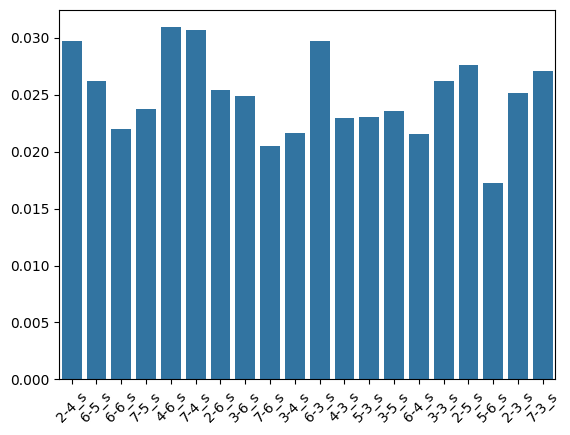

In [678]:
sns.barplot(x=order_f[0], y=[np.asarray(i).mean() for i in errors_storage_f.values()])
plt.xticks(rotation=45)

In [679]:
import graph
graphs = graph.Graphs(
    d.CORE_PARTS["default"]["ALL_CELLS"],
    prefix="_s"
)
graphs._make_graph()

In [680]:
graphs.graph

{'7-6_s': ['7-5_s', '6-6_s'],
 '7-5_s': ['7-6_s', '6-5_s', '7-4_s'],
 '7-4_s': ['6-4_s', '7-5_s', '7-3_s'],
 '7-3_s': ['7-4_s', '6-3_s'],
 '6-6_s': ['7-6_s', '6-5_s', '5-6_s'],
 '6-5_s': ['6-4_s', '7-5_s', '6-6_s'],
 '6-4_s': ['7-4_s', '6-5_s', '6-3_s'],
 '6-3_s': ['6-4_s', '5-3_s', '7-3_s'],
 '5-6_s': ['4-6_s', '6-6_s'],
 '5-3_s': ['4-3_s', '6-3_s'],
 '4-6_s': ['5-6_s', '3-6_s'],
 '4-3_s': ['5-3_s', '3-3_s'],
 '3-6_s': ['4-6_s', '3-5_s', '2-6_s'],
 '3-5_s': ['3-4_s', '2-5_s', '3-6_s'],
 '3-4_s': ['3-5_s', '3-3_s', '2-4_s'],
 '3-3_s': ['3-4_s', '4-3_s', '2-3_s'],
 '2-6_s': ['3-6_s', '2-5_s'],
 '2-5_s': ['3-5_s', '2-6_s', '2-4_s'],
 '2-4_s': ['3-4_s', '2-3_s', '2-5_s'],
 '2-3_s': ['3-3_s', '2-4_s']}

In [681]:
walk = [
    '7-6_s', '7-5_s', '7-4_s', '7-3_s', 
    '6-3_s', '5-3_s', '4-3_s', '3-3_s', 
    '2-3_s', '2-4_s', '2-5_s', '2-6_s', 
    '3-6_s', '4-6_s', '5-6_s', '6-6_s'
]

In [682]:
# full walk graph implementtion
def graph_cell_fit(
    features,
    df,
    iter_times: int = 10,
    ret_order: bool = False,
    valid_set: bool = False
):
    scores_storage = defaultdict(list)
    errors_storage = defaultdict(list)
    order_storage = []

    for _ in range(iter_times):
        selected_keys = []
        key_features = features.copy()
        print(key_features)
        df_c = df.copy()
        
        index = random.randint(0, len(walk.copy())-1)
        walk_route = graphs.make_walk_route(walk[index])
        print("walk route:", walk_route)
        investifated = []
        
        for i in walk_route:
            edges = graphs.graph[i]
            for j in [i, *edges]:
                if j in investifated:
                    continue
                # print()
                step_sel = key_features[key_features.index(j)]    
        
                y = df_c.loc[:, step_sel]
                if len(investifated) == 0:
                    X_raw = df_c.drop(
                        key_features,
                        axis=1
                    )
                else:
                    to_drop = list(set(key_features).difference(set(selected_keys)))
                    X_raw = df_c.drop(
                        to_drop,
                        axis=1
                    )
                investifated.append(j)                
                selected_keys.append(step_sel)
                key_features.remove(step_sel)
                
                # print("predicts:\n", step_sel, "\n", "to_predict:\n", X_raw.columns, "\n", "investigated:\n", investifated, "\n")
            
                ct = ColumnTransformer(
                    [
                        ("", StandardScaler(), X_raw.columns)
                        # ("", StandardScaler(), persantage_cols),
                        # ("norm", Normalizer(), list(set(X_raw).difference(set(persantage_cols)) ))
                    ],
                    remainder="passthrough"
                ).set_output(transform="pandas")
                
                X = ct.fit_transform(X_raw)
                X_train, X_test,\
                y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                
                model = GradientBoostingRegressor().fit(X_train, y_train)
                
                scores_storage[step_sel].append(
                    model.score(X_test, y_test)    
                )
                y_pred = model.predict(X_test) 
                
                errors_storage[step_sel].append(
                    mean_absolute_error(
                        y_test,
                        y_pred
                    )    
                )
    
                # replace column by predicted values to use them as input data in the next step
                # df_c.loc[y_test_ts1_test.index, step_sel] = y_gbr_ts1_test
                    
        order_storage.append(selected_keys)

    if ret_order:
        return errors_storage, scores_storage, order_storage
        
    return errors_storage, scores_storage

In [683]:
errors_storage_fg,  scores_storage_fg, order_fg = graph_cell_fit(
    display.Display().CORE_PARTS["coef"]["ALL_CELLS"].copy(),
    df_ts_test,
    iter_times=10,
    ret_order=True
)

['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-6_s', '6-5_s', '6-4_s', '6-3_s', '5-6_s', '5-3_s', '4-6_s', '4-3_s', '3-6_s', '3-5_s', '3-4_s', '3-3_s', '2-6_s', '2-5_s', '2-4_s', '2-3_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
walk route: ['5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s', '7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-6_s', '6-5_s', '6-4_s', '6-3_s', '5-6_s', '5-3_s', '4-6_s', '4-3_s', '3-6_s', '3-5_s', '3-4_s', '3-3_s', '2-6_s', '2-5_s', '2-4_s', '2-3_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
walk route: ['2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s', '7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s

In [684]:
errors_storage_fg, order_fg, np.asarray(list(errors_storage_fg.values())).mean()

(defaultdict(list,
             {'5-3_s': [0.024376470285621628,
               0.022391204041718984,
               0.021653594367941183,
               0.020661957070096854,
               0.020143845701993887,
               0.023532670881833705,
               0.020155864655344073,
               0.022082370922168446,
               0.021081161121874768,
               0.02090251985625778],
              '4-3_s': [0.02364837602572904,
               0.02208043887045187,
               0.02351745885836035,
               0.024150780896383464,
               0.024998368233604087,
               0.025254392556657075,
               0.024984483280535336,
               0.02172075568694152,
               0.025078623111860387,
               0.024549984783666347],
              '6-3_s': [0.030241479599713822,
               0.027024877376778316,
               0.024854920359638707,
               0.02712149569192861,
               0.025587719606022064,
               0.0277112413006252

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2-4_s'),
  Text(1, 0, '6-5_s'),
  Text(2, 0, '6-6_s'),
  Text(3, 0, '7-5_s'),
  Text(4, 0, '4-6_s'),
  Text(5, 0, '7-4_s'),
  Text(6, 0, '2-6_s'),
  Text(7, 0, '3-6_s'),
  Text(8, 0, '7-6_s'),
  Text(9, 0, '3-4_s'),
  Text(10, 0, '6-3_s'),
  Text(11, 0, '4-3_s'),
  Text(12, 0, '5-3_s'),
  Text(13, 0, '3-5_s'),
  Text(14, 0, '6-4_s'),
  Text(15, 0, '3-3_s'),
  Text(16, 0, '2-5_s'),
  Text(17, 0, '5-6_s'),
  Text(18, 0, '2-3_s'),
  Text(19, 0, '7-3_s')])

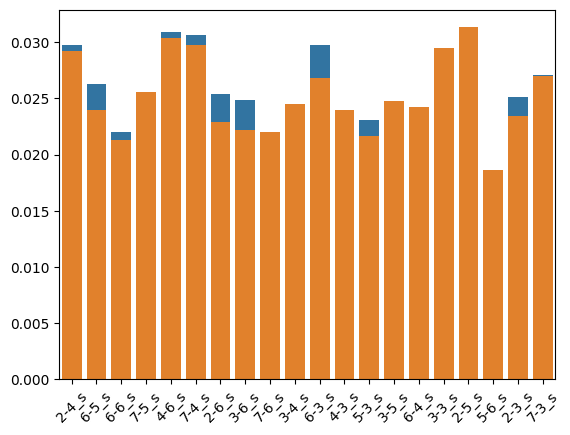

In [685]:
sns.barplot(x=order_f[0], y=[np.asarray(i).mean() for i in errors_storage_f.values()])
sns.barplot(x=order_fg[0], y=[np.asarray(i).mean() for i in errors_storage_fg.values()])
plt.xticks(rotation=45)

In [686]:
import re


def sector_graph_cell_fit(
    features,
    df,
    random_walk: bool = True,
    drop_not_neigbours: bool = True,
    iter_times: int = 10,
    ret_order: bool = False,
    valid_set: bool = False
):
    scores_storage = defaultdict(list)
    errors_storage = defaultdict(list)
    order_storage = []

    for _ in range(iter_times):
        selected_keys = []
        key_features = features.copy()
        # print(key_features)
        df_c = df.copy()

        index = 0
        if random_walk:
            index = random.randint(0, len(walk.copy())-1)
        walk_route = graphs.make_walk_route(walk[index])
        # print("walk route:", walk_route)
        investifated = []
        
        for i in walk_route:
            edges_top = graphs.graph[i]
            
            # print("parent node: ", i)
            # print("pairs: ", edges_top)
            
            edges_top = [i, *edges_top]
            for j in edges_top:
                if j in investifated:
                    continue

                new_edges = graphs.graph[j] # edges to node that is currently processing
                step_sel = key_features[key_features.index(j)]    
        
                y = df_c.loc[:, step_sel]
                investifated.append(j)
                
                if len(investifated) == 1:
                    X_raw = df_c.drop(
                        key_features,
                        axis=1
                    )
                else:

                    # INCORRECT -> all edges belongs to parent node
                    # edges_top mus update according to current node
                    # edges_top.remove(j) # remove currenly predicting col
                    
                    
                    investifated_edges = set(investifated).intersection(set(new_edges))
                    to_drop = list(
                        set(key_features).difference(investifated_edges)
                    )

                    if drop_not_neigbours:
                        to_drop_c = to_drop.copy()
                        for i in to_drop_c:
                            res, *_ = re.findall(r'\d*-\d*', i) 
                            for j in df_c.columns:
                                if res in j:
                                    if not j in to_drop:
                                        # print(f"adding {j}")
                                        to_drop.append(j)
                                    
                    
                    # print("to use in step:", investifated_edges)
                    
                    X_raw = df_c.drop(
                        to_drop,
                        axis=1
                    )

                
                
                selected_keys.append(step_sel)
                # key_features.remove(step_sel)
                
                # print("predicts:\n", j, "\n", "to_predict:\n", X_raw.columns, "\n", "investigated:\n", investifated, "\n")
            
                ct = ColumnTransformer(
                    [
                        ("", StandardScaler(), X_raw.columns)
                        # ("", StandardScaler(), persantage_cols),
                        # ("norm", Normalizer(), list(set(X_raw).difference(set(persantage_cols)) ))
                    ],
                    remainder="passthrough"
                ).set_output(transform="pandas")
                
                X = ct.fit_transform(X_raw)
                X_train, X_test,\
                y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                
                model = GradientBoostingRegressor().fit(X_train, y_train)
                
                scores_storage[step_sel].append(
                    model.score(X_test, y_test)    
                )
                y_pred = model.predict(X_test) 
                
                errors_storage[step_sel].append(
                    mean_absolute_error(
                        y_test,
                        y_pred
                    )    
                )

                
                # replace column by predicted values to use them as input data in the next step
                # df_c.loc[y_test_ts1_test.index, step_sel] = y_gbr_ts1_test
            edges_top.clear()        
        order_storage.append(selected_keys)

    if ret_order:
        return errors_storage, scores_storage, order_storage
        
    return errors_storage, scores_storage

In [687]:
errors_storage_fgs,  scores_storage_fgs, order_fgs = sector_graph_cell_fit(
    display.Display().CORE_PARTS["coef"]["ALL_CELLS"].copy(),
    df_ts_test,
    iter_times=10,
    drop_not_neigbours=False,
    ret_order=True
)

['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-

In [688]:
errors_storage_fgs, order_fgs, np.asarray(list(errors_storage_fgs.values())).mean()

(defaultdict(list,
             {'2-4_s': [0.029517916564445766,
               0.027872702031806466,
               0.027561481955977758,
               0.027801539450123036,
               0.027839273438953576,
               0.028060604366304764,
               0.02747935517797261,
               0.027802776236172742,
               0.02967824941158193,
               0.027825125150312293],
              '3-4_s': [0.022641993683384296,
               0.026474418653512723,
               0.026668874780861797,
               0.02634588086579659,
               0.02675489639314361,
               0.026244060170784355,
               0.026486541647738126,
               0.026504839242362816,
               0.022687571554497653,
               0.026535752168986102],
              '2-3_s': [0.021600634051499774,
               0.02413141326650491,
               0.023110618055925986,
               0.024260873944290797,
               0.02359176570760911,
               0.0246322114354459

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2-4_s'),
  Text(1, 0, '6-5_s'),
  Text(2, 0, '6-6_s'),
  Text(3, 0, '7-5_s'),
  Text(4, 0, '4-6_s'),
  Text(5, 0, '7-4_s'),
  Text(6, 0, '2-6_s'),
  Text(7, 0, '3-6_s'),
  Text(8, 0, '7-6_s'),
  Text(9, 0, '3-4_s'),
  Text(10, 0, '6-3_s'),
  Text(11, 0, '4-3_s'),
  Text(12, 0, '5-3_s'),
  Text(13, 0, '3-5_s'),
  Text(14, 0, '6-4_s'),
  Text(15, 0, '3-3_s'),
  Text(16, 0, '2-5_s'),
  Text(17, 0, '5-6_s'),
  Text(18, 0, '2-3_s'),
  Text(19, 0, '7-3_s')])

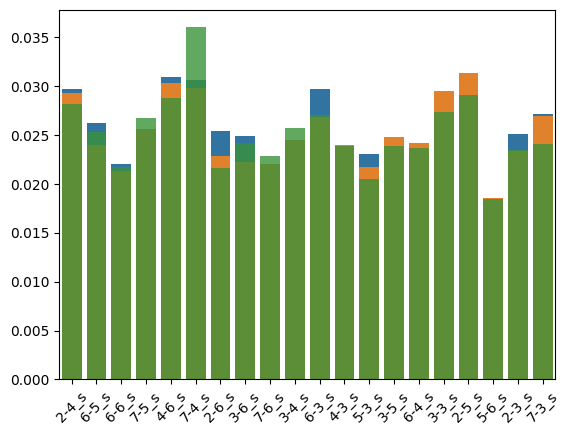

In [689]:
sns.barplot(x=order_f[0], y=[np.asarray(i).mean() for i in errors_storage_f.values()])
sns.barplot(x=order_fg[0], y=[np.asarray(i).mean() for i in errors_storage_fg.values()])
sns.barplot(x=order_fgs[0], y=[np.asarray(i).mean() for i in errors_storage_fgs.values()], alpha=0.8)
plt.xticks(rotation=45)

## From experience above:
### random walk approach helps to reduce MAE from 0.037 to 0.025
### random walk + graphs seems to be a bit robust 
### random walk + sector graphs method has shown much worse accuracy

## I have an idea to improve accuracy
### From random walk approach the errors vs cell distribution has obtained
### This distribution can be used to optimize leraning flow as follows:
#### use cell with lowest MAE as first cell to predict
#### use other cells to predict taking cells based on errors sorted in ascending order

In [690]:
def straight_cell_fit(
    features,
    df,
    iter_times: int = 10,
    ret_order: bool = False,
    valid_set: bool = False
):
    scores_storage = defaultdict(list)
    errors_storage = defaultdict(list)
    order_storage = []

    # df = df.drop(features, axis=1)

    for _ in range(iter_times):
        selected_keys = []
        key_features = features.copy()

        df_c = df.copy()
        
        for n, i in enumerate(features):
        
            step_sel = i
            
            y = df_c.loc[:, step_sel]
            
            X_raw = df_c.drop(
                key_features,
                axis=1
            )
        
            # print("predicts:", step_sel, "to_predict:", X_raw.columns)
            
            selected_keys.append(step_sel)
            key_features.remove(step_sel)
        
            # print("selected:\n", selected_keys, "\n", "left:\n", key_features)
            
            ct = ColumnTransformer(
                [
                    ("", StandardScaler(), X_raw.columns)
                ]
            ).set_output(transform="pandas")
            
            X = ct.fit_transform(X_raw)
            X_train, X_test,\
            y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=n)
            
            model = GradientBoostingRegressor().fit(X_train, y_train)
            
            scores_storage[step_sel].append(
                model.score(X_test, y_test)    
            )
            y_pred = model.predict(X_test) 
            
            errors_storage[step_sel].append(
                mean_absolute_error(
                    y_test,
                    y_pred
                )    
            )

            # replace column by predicted values to use them as input data in the next step
            # df_c.loc[y_test_ts1_test.index, step_sel] = y_gbr_ts1_test
                
        order_storage.append(selected_keys)

    if ret_order:
        return errors_storage, scores_storage, order_storage
        
    return errors_storage, scores_storage

In [691]:
errors_storage_str,  scores_storage_str, order_str = straight_cell_fit(
    display.Display().CORE_PARTS["coef"]["ALL_CELLS"].copy(),
    df_ts_test,
    iter_times=10,
    ret_order=True
)

In [692]:
errors_storage_str, order_str, np.asarray(list(errors_storage_str.values())).mean()

(defaultdict(list,
             {'7-6_s': [0.03171502002621036,
               0.0316684184710064,
               0.031707824319391356,
               0.03165309761669599,
               0.03165982455328211,
               0.031848790908375835,
               0.03155109866077433,
               0.031912657497474406,
               0.03198515231708529,
               0.031508749549462374],
              '7-5_s': [0.024424859191895135,
               0.024890569266811675,
               0.024700732887043275,
               0.024503650989891403,
               0.024287917728388973,
               0.024663449328665682,
               0.02454907535414344,
               0.024529512665893927,
               0.02452706813794846,
               0.024758935369895145],
              '7-4_s': [0.02285469491410561,
               0.02279192758669266,
               0.02286313799872357,
               0.02317235872584877,
               0.02281364026028417,
               0.023130015654967948,
    

In [693]:
def independent_cell_fit(
    features,
    df,
    iter_times: int = 10,
    ret_order: bool = False,
    valid_set: bool = False
):
    scores_storage = defaultdict(list)
    errors_storage = defaultdict(list)
    order_storage = []

    # df = df.drop(features, axis=1)

    for _ in range(iter_times):
        selected_keys = []
        key_features = features.copy()

        df_c = df.copy()
        
        for n, i in enumerate(features):
        
            step_sel = i
            
            y = df_c.loc[:, step_sel]
            
            X_raw = df_c.drop(
                key_features,
                axis=1
            )
        
            # print("predicts:", step_sel, "to_predict:", X_raw.columns)
            
            selected_keys.append(step_sel)
            # key_features.remove(step_sel)
        
            # print("selected:\n", selected_keys, "\n", "left:\n", key_features)
            
            ct = ColumnTransformer(
                [
                    ("", StandardScaler(), X_raw.columns)
                ]
            ).set_output(transform="pandas")
            
            X = ct.fit_transform(X_raw)
            X_train, X_test,\
            y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=n)
            
            model = GradientBoostingRegressor().fit(X_train, y_train)
            
            scores_storage[step_sel].append(
                model.score(X_test, y_test)    
            )
            y_pred = model.predict(X_test) 
            
            errors_storage[step_sel].append(
                mean_absolute_error(
                    y_test,
                    y_pred
                )    
            )

            # replace column by predicted values to use them as input data in the next step
            # df_c.loc[y_test_ts1_test.index, step_sel] = y_gbr_ts1_test
                
        order_storage.append(selected_keys)

    if ret_order:
        return errors_storage, scores_storage, order_storage
        
    return errors_storage, scores_storage

In [694]:
errors_storage_indep,  scores_storage_indep, order_indep = independent_cell_fit(
    display.Display().CORE_PARTS["coef"]["ALL_CELLS"].copy(),
    df_ts_test,
    iter_times=10,
    ret_order=True
)

In [695]:
errors_storage_indep, order_indep, np.asarray(list(errors_storage_indep.values())).mean()

(defaultdict(list,
             {'7-6_s': [0.03212867413270736,
               0.031783772680350965,
               0.03182260963461666,
               0.03153953283464115,
               0.031884706157887625,
               0.03160789420240854,
               0.03149369108638623,
               0.031312223563367936,
               0.031810522943513095,
               0.031446443875923255],
              '7-5_s': [0.023690085214342908,
               0.02406840259629178,
               0.024066182855202442,
               0.023662398454337385,
               0.02415755584774289,
               0.023913002203166927,
               0.024134363870734758,
               0.024173131941220227,
               0.02396408957602095,
               0.023856396711272786],
              '7-4_s': [0.029783630293019548,
               0.030286941583499427,
               0.030500351933414677,
               0.03019918796272064,
               0.03035055511074125,
               0.030587587124585293,


In [696]:
def ordered_cell_fit(
    features,
    df,
    order: list,
    iter_times: int = 10,
    ret_order: bool = False,
    valid_set: bool = False
):
    scores_storage = defaultdict(list)
    errors_storage = defaultdict(list)
    order_storage = []

    # df = df.drop(features, axis=1)

    for _ in range(iter_times):
        selected_keys = []
        key_features = features.copy()

        df_c = df.copy()
        
        for i in range(len(features)):
        
            elem = order[i]
            step_sel = key_features[key_features.index(elem)]
            
            y = df_c.loc[:, step_sel]
            
            if i == -1:
                X_raw = df_c.drop(
                    key_features,
                    axis=1
                )
            else:
                to_drop = list(set(key_features).difference(set(selected_keys)))
                X_raw = df_c.drop(
                    to_drop,
                    axis=1
                )
        
            # print("predicts:", step_sel, "to_predict:", X_raw_ts1_test.columns)
            
            selected_keys.append(step_sel)
            key_features.remove(step_sel)
        
            # print("selected:\n", selected_keys, "\n", "left:\n", key_features)
            
            ct = ColumnTransformer(
                [
                    ("", StandardScaler(), X_raw.columns)
                ]
            ).set_output(transform="pandas")
            
            X = ct.fit_transform(X_raw)
            X_train, X_test,\
            y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
            
            model = GradientBoostingRegressor().fit(X_train, y_train)
            
            scores_storage[step_sel].append(
                model.score(X_test, y_test)    
            )
            y_pred = model.predict(X_test) 
            
            errors_storage[step_sel].append(
                mean_absolute_error(
                    y_test,
                    y_pred
                )    
            )

            # replace column by predicted values to use them as input data in the next step
            # df_c.loc[y_test_ts1_test.index, step_sel] = y_gbr_ts1_test
                
        order_storage.append(selected_keys)

    if ret_order:
        return errors_storage, scores_storage, order_storage
        
    return errors_storage, scores_storage

In [697]:
best_order = np.asarray(list(errors_storage_f.keys())) [ np.asarray([np.asarray(i).mean() for i in errors_storage_f.values()]).argsort() ]
print(best_order)

errors_storage_f_ordered,  scores_storage_f_ordered, order_f_ordered = ordered_cell_fit(
    display.Display().CORE_PARTS["coef"]["ALL_CELLS"].copy(),
    df_ts_test,
    order=best_order,
    iter_times=10,
    ret_order=True
)

['5-6_s' '7-6_s' '6-4_s' '3-4_s' '6-6_s' '4-3_s' '5-3_s' '3-5_s' '7-5_s'
 '3-6_s' '2-3_s' '2-6_s' '3-3_s' '6-5_s' '7-3_s' '2-5_s' '6-3_s' '2-4_s'
 '7-4_s' '4-6_s']


In [698]:
errors_storage_f_ordered, order_f_ordered, np.asarray(list(errors_storage_f_ordered.values())).mean()

(defaultdict(list,
             {'5-6_s': [0.016850419398448283,
               0.01676729118242757,
               0.01662740037053849,
               0.01662594728567403,
               0.016674133890311922,
               0.01703418191959669,
               0.01630017501713333,
               0.01707823382238721,
               0.016886640038325997,
               0.016440533723038737],
              '7-6_s': [0.0263321457135233,
               0.026352479222482315,
               0.0256562837871746,
               0.025778964454087082,
               0.026211846834506485,
               0.026305949976335716,
               0.0262683875100199,
               0.02630326577997621,
               0.026395334497328084,
               0.025836631852562054],
              '6-4_s': [0.02581525252601998,
               0.025888039824832714,
               0.0258851812991271,
               0.025830957513726764,
               0.02606387894282209,
               0.025733999402275085,
       

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2-4_s'),
  Text(1, 0, '6-5_s'),
  Text(2, 0, '6-6_s'),
  Text(3, 0, '7-5_s'),
  Text(4, 0, '4-6_s'),
  Text(5, 0, '7-4_s'),
  Text(6, 0, '2-6_s'),
  Text(7, 0, '3-6_s'),
  Text(8, 0, '7-6_s'),
  Text(9, 0, '3-4_s'),
  Text(10, 0, '6-3_s'),
  Text(11, 0, '4-3_s'),
  Text(12, 0, '5-3_s'),
  Text(13, 0, '3-5_s'),
  Text(14, 0, '6-4_s'),
  Text(15, 0, '3-3_s'),
  Text(16, 0, '2-5_s'),
  Text(17, 0, '5-6_s'),
  Text(18, 0, '2-3_s'),
  Text(19, 0, '7-3_s')])

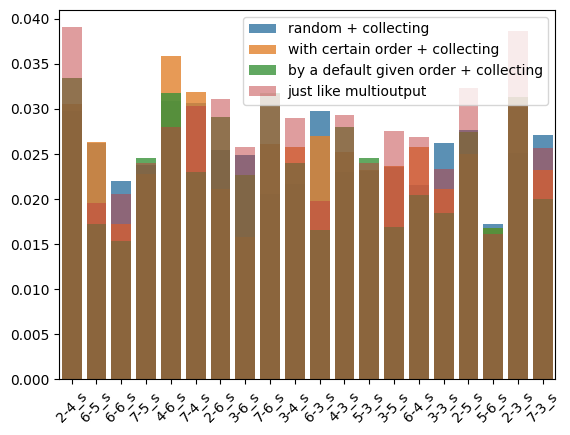

In [699]:
sns.barplot(x=order_f[0], y=[np.asarray(i).mean() for i in errors_storage_f.values()], alpha=0.8, label="random + collecting")
sns.barplot(x=order_f_ordered[0], y=[np.asarray(i).mean() for i in errors_storage_f_ordered.values()], alpha=0.8, label="with certain order + collecting")
sns.barplot(x=order_indep[0], y=[np.asarray(i).mean() for i in errors_storage_str.values()], alpha=0.8, label="by a default given order + collecting")
sns.barplot(x=order_str[0], y=[np.asarray(i).mean() for i in errors_storage_indep.values()], alpha=0.5, label="just like multioutput")
plt.xticks(rotation=45)

In [700]:
def graph_cell_fit_model_free(
    features,
    df,
    iter_times: int = 10,
    estimator: object | None = None,
    ret_order: bool = False,
    valid_set: bool = False
):
    if estimator is None:
        estimator = GradientBoostingRegressor()
        
    scores_storage = defaultdict(list)
    errors_storage = defaultdict(list)
    order_storage = []

    for _ in range(iter_times):
        selected_keys = []
        key_features = features.copy()
        # print(key_features)
        df_c = df.copy()
        
        index = random.randint(0, len(walk.copy())-1)
        walk_route = graphs.make_walk_route(walk[index])
        # print("walk route:", walk_route)
        investifated = []
        
        for i in walk_route:
            edges = graphs.graph[i]
            for j in [i, *edges]:
                if j in investifated:
                    continue
                # print()
                step_sel = key_features[key_features.index(j)]    
        
                y = df_c.loc[:, step_sel]
                if len(investifated) == 0:
                    X_raw = df_c.drop(
                        key_features,
                        axis=1
                    )
                else:
                    to_drop = list(set(key_features).difference(set(selected_keys)))
                    X_raw = df_c.drop(
                        to_drop,
                        axis=1
                    )
                investifated.append(j)                
                selected_keys.append(step_sel)
                key_features.remove(step_sel)
                
                # print("predicts:\n", step_sel, "\n", "to_predict:\n", X_raw.columns, "\n", "investigated:\n", investifated, "\n")
            
                ct = ColumnTransformer(
                    [
                        ("", StandardScaler(), X_raw.columns)
                        # ("", StandardScaler(), persantage_cols),
                        # ("norm", Normalizer(), list(set(X_raw).difference(set(persantage_cols)) ))
                    ],
                    remainder="passthrough"
                ).set_output(transform="pandas")
                
                X = ct.fit_transform(X_raw)
                X_train, X_test,\
                y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=index)
                
                model = estimator.fit(X_train, y_train)
                
                scores_storage[step_sel].append(
                    model.score(X_test, y_test)    
                )
                y_pred = model.predict(X_test) 
                
                errors_storage[step_sel].append(
                    mean_absolute_error(
                        y_test,
                        y_pred
                    )    
                )
    
                # replace column by predicted values to use them as input data in the next step
                # df_c.loc[y_test_ts1_test.index, step_sel] = y_gbr_ts1_test
                    
        order_storage.append(selected_keys)

    if ret_order:
        return errors_storage, scores_storage, order_storage
        
    return errors_storage, scores_storage

In [701]:
errors_storage_fg_rigde,  scores_storage_fg_rigde, order_fg_rigde = graph_cell_fit_model_free(
    display.Display().CORE_PARTS["coef"]["ALL_CELLS"].copy(),
    df_ts_test,
    estimator=Ridge(),
    iter_times=10,
    ret_order=True
)

['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-

In [702]:
errors_storage_fg_rigde, order_fg_rigde, np.asarray(list(errors_storage_fg_rigde.values())).mean()

(defaultdict(list,
             {'4-6_s': [0.03649747559084078,
               0.029360914289695644,
               0.03215386976191463,
               0.033933554136415724,
               0.02835206787510913,
               0.033933554136415724,
               0.022618800661745746,
               0.023697621600741344,
               0.029360914289695644,
               0.030728199242743625],
              '5-6_s': [0.01335408344516961,
               0.013546901584418234,
               0.010180765466673422,
               0.011256093451666213,
               0.012983108957096036,
               0.011256093451666213,
               0.010531545913261421,
               0.009196856403918003,
               0.013546901584418234,
               0.011729937465476828],
              '3-6_s': [0.011461566359755421,
               0.008329702371783456,
               0.010193947498578847,
               0.009866409940799244,
               0.009232486195084504,
               0.00986640994079

In [703]:
np.asarray(d.CORE_PARTS["coef"]["ALL_CELLS"]), np.asarray(order_fg_rigde[4]).argsort(), order_fg_rigde[4]

(array(['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-6_s', '6-5_s', '6-4_s',
        '6-3_s', '5-6_s', '5-3_s', '4-6_s', '4-3_s', '3-6_s', '3-5_s',
        '3-4_s', '3-3_s', '2-6_s', '2-5_s', '2-4_s', '2-3_s'], dtype='<U5'),
 array([ 0,  2,  4,  6,  1,  3,  5,  7, 19,  8, 18,  9, 17, 15, 12, 10, 16,
        14, 13, 11]),
 ['2-3_s',
  '3-3_s',
  '2-4_s',
  '3-4_s',
  '2-5_s',
  '3-5_s',
  '2-6_s',
  '3-6_s',
  '4-6_s',
  '5-6_s',
  '6-6_s',
  '7-6_s',
  '6-5_s',
  '7-5_s',
  '7-4_s',
  '6-4_s',
  '7-3_s',
  '6-3_s',
  '5-3_s',
  '4-3_s'])

In [704]:
def straight_cell_fit_model_free(
    features,
    df,
    iter_times: int = 10,
    estimator: object | None = None,
    inpedendence: bool = None,
    ret_order: bool = False,
    valid_set: bool = False,
    ret_res: bool = False
):
    if estimator is None:
        estimator = GradientBoostingRegressor()
    
    scores_storage = defaultdict(list)
    errors_storage = defaultdict(list)
    results = []
    order_storage = []

    # df = df.drop(features, axis=1)

    for _ in range(iter_times):
        selected_keys = []
        key_features = features.copy()

        df_c = df.copy()
        
        for n, i in enumerate(features):
        
            step_sel = i
            
            y = df_c.loc[:, step_sel]
            
            X_raw = df_c.drop(
                key_features,
                axis=1
            )
        
            # print("predicts:", step_sel, "to_predict:", X_raw.columns)
            
            selected_keys.append(step_sel)
            
            if not inpedendence:
                key_features.remove(step_sel)
        
            # print("selected:\n", selected_keys, "\n", "left:\n", key_features)
            
            ct = ColumnTransformer(
                [
                    ("", StandardScaler(), X_raw.columns)
                ]
            ).set_output(transform="pandas")
            
            X = ct.fit_transform(X_raw)
            X_train, X_test,\
            y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=n)
            model = estimator.fit(X_train, y_train)
            
            scores_storage[step_sel].append(
                model.score(X_test, y_test)    
            )
            y_pred = model.predict(X_test) 
            
            errors_storage[step_sel].append(
                mean_absolute_error(
                    y_test,
                    y_pred
                )    
            )

            # replace column by predicted values to use them as input data in the next step
            # df_c.loc[y_test_ts1_test.index, step_sel] = y_gbr_ts1_test
                
        order_storage.append(selected_keys)
        results.append(y_pred)

    if ret_order:
        return errors_storage, scores_storage, order_storage
        
    return errors_storage, scores_storage

In [705]:
errors_storage_str_rigde,  scores_storage_str_rigde, order_str_rigde = straight_cell_fit_model_free(
    display.Display().CORE_PARTS["coef"]["ALL_CELLS"].copy(),
    df_ts_test,
    estimator=Ridge(),
    iter_times=1,
    ret_order=True
)

In [710]:
errors_storage_str_rigde, order_str_rigde, np.asarray(list(errors_storage_str_rigde.values())).mean()

(defaultdict(list,
             {'7-6_s': [0.02488018711571603],
              '7-5_s': [0.01483278128343167],
              '7-4_s': [0.01204298303781734],
              '7-3_s': [0.012926691334519668],
              '6-6_s': [0.010307551298804262],
              '6-5_s': [0.011827732896506411],
              '6-4_s': [0.012527479266405359],
              '6-3_s': [0.01197565776257477],
              '5-6_s': [0.011162546218868568],
              '5-3_s': [0.01568548811756526],
              '4-6_s': [0.026679810340051974],
              '4-3_s': [0.015353326756606204],
              '3-6_s': [0.007231802739242631],
              '3-5_s': [0.008439538944623345],
              '3-4_s': [0.0094146495534888],
              '3-3_s': [0.009359024532742592],
              '2-6_s': [0.012659819066086792],
              '2-5_s': [0.01306541412009459],
              '2-4_s': [0.012991062017419118],
              '2-3_s': [0.011329268251740474]}),
 [['7-6_s',
   '7-5_s',
   '7-4_s',
   '7-3_s',

In [707]:
errors_storage_indep_rigde,  scores_storage_indep_rigde, order_indep_rigde = straight_cell_fit_model_free(
    display.Display().CORE_PARTS["coef"]["ALL_CELLS"].copy(),
    df_ts_test,
    estimator=Ridge(),
    inpedendence=True,
    iter_times=1,
    ret_order=True
)

In [708]:
errors_storage_indep_rigde, order_indep_rigde, np.asarray(list(errors_storage_indep_rigde.values())).mean()

(defaultdict(list,
             {'7-6_s': [0.02488018711571603],
              '7-5_s': [0.016187195761209673],
              '7-4_s': [0.01402165244201098],
              '7-3_s': [0.013148105975879709],
              '6-6_s': [0.010604226756239267],
              '6-5_s': [0.013764905013180083],
              '6-4_s': [0.014501337532373973],
              '6-3_s': [0.014456558317637666],
              '5-6_s': [0.01416780919929955],
              '5-3_s': [0.016583639457815113],
              '4-6_s': [0.033427722059877596],
              '4-3_s': [0.019356751782837966],
              '3-6_s': [0.006783189774045283],
              '3-5_s': [0.010372986649724972],
              '3-4_s': [0.014200993832187139],
              '3-3_s': [0.012023320895257565],
              '2-6_s': [0.015014735605015754],
              '2-5_s': [0.014981860083089087],
              '2-4_s': [0.014822818483946029],
              '2-3_s': [0.019057981090004065]}),
 [['7-6_s',
   '7-5_s',
   '7-4_s',
   '7-

Text(0.5, 0, 'Ячейка активной зоны')

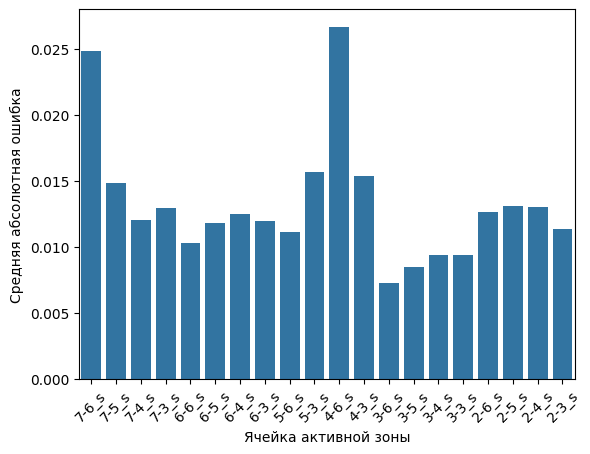

In [709]:
# sns.barplot(x=order_f[0], y=[np.asarray(i).mean() for i in errors_storage_f.values()], label="gbr + collecting")
# sns.barplot(x=order_fg[0], y=[np.asarray(i).mean() for i in errors_storage_fg.values()], label="gbr + graph + collecting")
# sns.barplot(x=order_fg_rigde[0], y=[np.asarray(i).mean() for i in errors_storage_fg_rigde.values()], alpha=1, label="ridge + graph + collecting")
sns.barplot(x=order_str_rigde[0], y=[np.asarray(i).mean() for i in errors_storage_str_rigde.values()], alpha=1) #label="ridge + by a default given order + collecting")
plt.xticks(rotation=45)
plt.ylabel("Средняя абсолютная ошибка")
plt.xlabel("Ячейка активной зоны")

## lets sum up what we've gotten for each cell by models
## I have made some optimizations like moves to check whether i can improve accuracy

In [310]:
esf_val = np.asarray(list(errors_storage_f.values())).mean(axis=1)
esf_key = np.asarray(list(errors_storage_f.keys()))
esf_sorted = esf_val.argsort()
for i in esf_sorted:
    print(f"key: {esf_key[i]}, val: {esf_val[i]}")

key: 5-6_s, val: 0.016750434086323825
key: 3-4_s, val: 0.01717675626418482
key: 7-3_s, val: 0.01740026971502948
key: 6-3_s, val: 0.022026904802603848
key: 2-6_s, val: 0.022063023030420553
key: 6-6_s, val: 0.023713329984058878
key: 6-4_s, val: 0.024059123765821845
key: 6-5_s, val: 0.02409452798102015
key: 3-3_s, val: 0.024697787527646873
key: 7-6_s, val: 0.02493714308426672
key: 7-4_s, val: 0.025395270198073833
key: 3-6_s, val: 0.025853609209975793
key: 5-3_s, val: 0.027706122407144713
key: 4-3_s, val: 0.027881214616216964
key: 7-5_s, val: 0.028637653162144422
key: 3-5_s, val: 0.02973061979992838
key: 2-4_s, val: 0.03161254315543115
key: 4-6_s, val: 0.03234933293672139
key: 2-5_s, val: 0.034562840788028085
key: 2-3_s, val: 0.03688122440745559


In [311]:
esfg_val = np.asarray(list(errors_storage_fg.values())).mean(axis=1)
esfg_key = np.asarray(list(errors_storage_fg.keys()))
esfg_sorted = esfg_val.argsort()
for i in esfg_sorted:
    print(f"key: {esfg_key[i]}, val: {esfg_val[i]}")

key: 3-4_s, val: 0.017174581079495474
key: 7-3_s, val: 0.017545624216385478
key: 2-6_s, val: 0.01789436886616074
key: 5-6_s, val: 0.01875170554462901
key: 6-3_s, val: 0.02011378652808107
key: 6-5_s, val: 0.021639640457162775
key: 6-4_s, val: 0.0247361386308114
key: 3-6_s, val: 0.024829346247807506
key: 6-6_s, val: 0.024923709426233023
key: 7-5_s, val: 0.025841903713119264
key: 7-4_s, val: 0.0265906072980228
key: 7-6_s, val: 0.026818166825622724
key: 3-3_s, val: 0.026854540306069024
key: 5-3_s, val: 0.02902086228439587
key: 4-3_s, val: 0.030640341906481773
key: 3-5_s, val: 0.03177468061510137
key: 4-6_s, val: 0.03242938948651468
key: 2-4_s, val: 0.0348869438424005
key: 2-5_s, val: 0.035514663875583156
key: 2-3_s, val: 0.036099874081857886


In [312]:
essr_val = np.asarray(list(errors_storage_str_rigde.values())).mean(axis=1)
essr_key = np.asarray(list(errors_storage_str_rigde.keys()))
essr_sorted = essr_val.argsort()
for i in essr_sorted:
    print(f"key: {essr_key[i]}, val: {essr_val[i]}")

key: 3-5_s, val: 0.008004524606814556
key: 3-4_s, val: 0.008630289061789012
key: 3-3_s, val: 0.00872423165721216
key: 5-6_s, val: 0.009313746897360113
key: 7-5_s, val: 0.00935221413821395
key: 2-4_s, val: 0.009659155406700683
key: 3-6_s, val: 0.011085226398879518
key: 2-5_s, val: 0.011909065023249902
key: 6-6_s, val: 0.012023492536426265
key: 6-3_s, val: 0.01216810644093479
key: 2-6_s, val: 0.012780706532292066
key: 6-4_s, val: 0.013681872966882466
key: 2-3_s, val: 0.013817533217739417
key: 7-4_s, val: 0.01638452098935792
key: 7-3_s, val: 0.018898981201061704
key: 5-3_s, val: 0.01984244696967761
key: 4-3_s, val: 0.019920161324595825
key: 7-6_s, val: 0.021794189462497962
key: 6-5_s, val: 0.02217265493731227
key: 4-6_s, val: 0.028056893906287024


In [313]:
def raw_cells_optimizer(
    features,
    df,
    iter_times: int = 10,
    estimator: object | None = None,
    ret_order: bool = False,
    valid_set: bool = False,
    ret_res: bool = False
):
    if estimator is None:
        estimator = GradientBoostingRegressor()
    
    scores_storage = defaultdict(list)
    errors_storage = defaultdict(list)
    results = []
    order_storage = []

    # df = df.drop(features, axis=1)

    for _ in range(iter_times):
        selected_keys = []
        key_features = features.copy()

        df_c = df.copy()
        
        for n, i in enumerate(features):
        
            step_sel = i
                
            y = df_c.loc[:, step_sel]
            
            X_raw = df_c.drop(
                key_features,
                axis=1
            )
        
            # print("predicts:", step_sel, "to_predict:", X_raw.columns)
            
            selected_keys.append(step_sel)
            key_features.remove(step_sel)
        
            # print("selected:\n", selected_keys, "\n", "left:\n", key_features)
            
            ct = ColumnTransformer(
                [
                    ("", StandardScaler(), X_raw.columns)
                ]
            ).set_output(transform="pandas")

            X = ct.fit_transform(X_raw)
            X_train, X_test,\
            y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=n)
            
            if "6-3" in step_sel:
                model = GradientBoostingRegressor().fit(X_train, y_train)
            else:
                model = estimator.fit(X_train, y_train)
            
            scores_storage[step_sel].append(
                model.score(X_test, y_test)    
            )
            y_pred = model.predict(X_test) 
            
            errors_storage[step_sel].append(
                mean_absolute_error(
                    y_test,
                    y_pred
                )    
            )

            # replace column by predicted values to use them as input data in the next step
            # df_c.loc[y_test_ts1_test.index, step_sel] = y_gbr_ts1_test
                
        order_storage.append(selected_keys)
        results.append(y_pred)

    if ret_order:
        return errors_storage, scores_storage, order_storage
        
    return errors_storage, scores_storage

In [314]:
errors_storage_ridge_opt,  scores_storage_ridge_opt, order_rigde_opt = raw_cells_optimizer(
    display.Display().CORE_PARTS["coef"]["ALL_CELLS"].copy(),
    df_ts_test,
    estimator=Ridge(),
    iter_times=10,
    ret_order=True
)

In [315]:
errors_storage_ridge_opt, order_rigde_opt, np.asarray(list(errors_storage_ridge_opt.values())).mean()

(defaultdict(list,
             {'7-6_s': [0.021794189462497962,
               0.021794189462497962,
               0.021794189462497962,
               0.021794189462497962,
               0.021794189462497962,
               0.021794189462497962,
               0.021794189462497962,
               0.021794189462497962,
               0.021794189462497962,
               0.021794189462497962],
              '7-5_s': [0.00935221413821395,
               0.00935221413821395,
               0.00935221413821395,
               0.00935221413821395,
               0.00935221413821395,
               0.00935221413821395,
               0.00935221413821395,
               0.00935221413821395,
               0.00935221413821395,
               0.00935221413821395],
              '7-4_s': [0.01638452098935792,
               0.01638452098935792,
               0.01638452098935792,
               0.01638452098935792,
               0.01638452098935792,
               0.01638452098935792,
      

In [318]:
def graph_raw_cells_optimizer(
    features,
    df,
    iter_times: int = 10,
    estimator: object | None = None,
    ret_order: bool = False,
    valid_set: bool = False
):
    if estimator is None:
        estimator = GradientBoostingRegressor()
        
    scores_storage = defaultdict(list)
    errors_storage = defaultdict(list)
    order_storage = []

    for _ in range(iter_times):
        selected_keys = []
        key_features = features.copy()
        # print(key_features)
        df_c = df.copy()
        
        index = random.randint(0, len(walk.copy())-1)
        walk_route = graphs.make_walk_route(walk[index])
        # print("walk route:", walk_route)
        investifated = []
        
        for i in walk_route:
            edges = graphs.graph[i]
            for j in [i, *edges]:
                if j in investifated:
                    continue
                # print()
                step_sel = key_features[key_features.index(j)]    
        
                y = df_c.loc[:, step_sel]
                if len(investifated) == 0:
                    X_raw = df_c.drop(
                        key_features,
                        axis=1
                    )
                else:
                    to_drop = list(set(key_features).difference(set(selected_keys)))
                    X_raw = df_c.drop(
                        to_drop,
                        axis=1
                    )
                investifated.append(j)                
                selected_keys.append(step_sel)
                key_features.remove(step_sel)
                
                # print("predicts:\n", step_sel, "\n", "to_predict:\n", X_raw.columns, "\n", "investigated:\n", investifated, "\n")
            
                ct = ColumnTransformer(
                    [
                        # ("", StandardScaler(), X_raw.columns)
                        ("", StandardScaler(), percentage_cols),
                        # ("norm", Normalizer(), list(set(X_raw).difference(set(persantage_cols)) ))
                    ],
                    remainder="passthrough"
                ).set_output(transform="pandas")
                
                X = ct.fit_transform(X_raw)
                X_train, X_test,\
                y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=index)
                
                if "6-3" in step_sel or "7-6" in step_sel:
                    model = GradientBoostingRegressor().fit(X_train, y_train)
                else:
                    model = estimator.fit(X_train, y_train)
                
                scores_storage[step_sel].append(
                    model.score(X_test, y_test)    
                )
                y_pred = model.predict(X_test) 
                
                errors_storage[step_sel].append(
                    mean_absolute_error(
                        y_test,
                        y_pred
                    )    
                )
    
                # replace column by predicted values to use them as input data in the next step
                # df_c.loc[y_test_ts1_test.index, step_sel] = y_gbr_ts1_test
                    
        order_storage.append(selected_keys)

    if ret_order:
        return errors_storage, scores_storage, order_storage
        
    return errors_storage, scores_storage

In [319]:
errors_storage_g_ridge_opt,  scores_storage_g_ridge_opt, order_g_rigde_opt = graph_raw_cells_optimizer(
    display.Display().CORE_PARTS["coef"]["ALL_CELLS"].copy(),
    df_ts_test,
    estimator=Ridge(),
    iter_times=10,
    ret_order=True
)

['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-

In [320]:
errors_storage_g_ridge_opt, order_g_rigde_opt, np.asarray(list(errors_storage_g_ridge_opt.values())).mean()

(defaultdict(list,
             {'2-3_s': [0.014200383259787907,
               0.01502400856710324,
               0.016234719793994126,
               0.018601903785527427,
               0.014770697125775379,
               0.015144261211984448,
               0.015356798654094006,
               0.01502400856710324,
               0.014200383259787907,
               0.016007145383591857],
              '3-3_s': [0.015593139664368462,
               0.013759555131345302,
               0.011594416847008904,
               0.007809316744202583,
               0.013175646574603102,
               0.013967200892251844,
               0.010124297090022594,
               0.013759555131345302,
               0.015593139664368462,
               0.01148338182505617],
              '2-4_s': [0.010647750175670847,
               0.011253471530352806,
               0.013009147305540925,
               0.008323997460888416,
               0.010532457946702904,
               0.0091076752546

# Apllying Basic Stacking Technique

In [428]:
errors_storage_str_stck,  scores_storage_str_stck, order_str_stck = straight_cell_fit_model_free(
    display.Display().CORE_PARTS["coef"]["ALL_CELLS"].copy(),
    df_ts_test,
    estimator=StackingRegressor(
        [
            ("bgr", GradientBoostingRegressor()),
            ("bridge", BayesianRidge()),
            ("ridge", Ridge())
        ]
    ),
    iter_times=10,
    ret_order=True
)

In [429]:
errors_storage_str_stck, order_str_stck, np.asarray(list(errors_storage_str_stck.values())).mean()

(defaultdict(list,
             {'7-6_s': [0.019786242807140253,
               0.01960025648626854,
               0.019760291768167605,
               0.01964061878927814,
               0.019661791762526824,
               0.019646440482115533,
               0.019628258952104828,
               0.01971404251404644,
               0.01966843465537513,
               0.019725100327735598],
              '7-5_s': [0.013768724809375072,
               0.013519040832641271,
               0.013644317743442632,
               0.013705368033980007,
               0.013680290032300141,
               0.01368344985633982,
               0.01372183670566408,
               0.013455575114185159,
               0.013428631175428363,
               0.013399908949816342],
              '7-4_s': [0.012992949178729335,
               0.012944048455825051,
               0.012843263537123329,
               0.012823865841140087,
               0.01273861803126128,
               0.01300582798417954

In [424]:
errors_storage_g_stck,  scores_storage_g_stck, order_g_stck = graph_cell_fit_model_free(
    display.Display().CORE_PARTS["coef"]["ALL_CELLS"].copy(),
    df_ts_test,
    estimator=StackingRegressor(
        [
            ("bgr", GradientBoostingRegressor()),
            ("bridge", BayesianRidge()),
            ("ridge", Ridge()),
        ]
    ),
    iter_times=10,
    ret_order=True
)

['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-6_s', '6-6_s']
['7-6_s', '7-5_s', '7-4_s', '7-3_s', '6-3_s', '5-3_s', '4-3_s', '3-3_s', '2-3_s', '2-4_s', '2-5_s', '2-6_s', '3-6_s', '4-6_s', '5-

In [425]:
errors_storage_g_stck, order_g_stck, np.asarray(list(errors_storage_g_stck.values())).mean()

(defaultdict(list,
             {'3-3_s': [0.020641817507114777,
               0.011015096513392537,
               0.015101180621212377,
               0.010895408574530075,
               0.004771069636874393,
               0.006957954659271429,
               0.007948458554500826,
               0.007264973875281925,
               0.009287779692941893,
               0.010346268520998252],
              '3-4_s': [0.01556456704642621,
               0.01089377203574869,
               0.008616454305305303,
               0.010877597926535164,
               0.017873428569123665,
               0.010246434607836667,
               0.009102496316196211,
               0.013417954139961451,
               0.010473802615724831,
               0.010483719034587195],
              '4-3_s': [0.01619497630911626,
               0.018335551933622875,
               0.008555137069251635,
               0.01833305506340604,
               0.010503466241083887,
               0.01853263306387